In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

clean_movie_data = pd.read_csv("clean_movie_data.csv")

clean_movie_data.describe()

,Year,Duration (min),Rating,Metascore
count,6404.000000,6404.000000,6404.000000,6404.000000
mean,2006.289975,110.068395,6.548782,57.363991
std,18.284315,19.477238,0.938561,17.629282
min,1929.000000,55.000000,1.900000,1.000000
25%,1997.000000,97.000000,6.000000,45.000000
50%,2012.000000,107.000000,6.600000,57.000000
75%,2021.000000,119.000000,7.200000,70.000000
max,2025.000000,321.000000,9.300000,100.000000


In [2]:
#Grabbing our values of Certificate, Rating, & Metascore
rating_scores = clean_movie_data[["Certificate", "Rating", "Metascore"]]
rating_scores

,Certificate,Rating,Metascore
0,R,6.4,67.0
1,PG-13,7.3,66.0
2,PG-13,5.5,42.0
3,PG-13,7.3,73.0
4,R,7.7,82.0
...,...,...,...
6399,A,6.9,77.0
6400,R,6.8,64.0
6401,U,7.6,87.0
6402,U,6.5,76.0


In [3]:
#Converting to a dataframe
movie_data_df = pd.DataFrame(rating_scores)

#Calculating our average based on Cerificate Rating
average_rating = movie_data_df.groupby('Certificate')['Rating'].mean().reset_index()
average_rating_df = average_rating
average_rating_df

,Certificate,Rating
0,(Banned),6.570000
1,12,6.000000
2,12+,6.815385
3,13,6.452174
4,15+,6.424000
5,16,6.526667
6,16+,6.300000
7,18,6.457738
8,18+,4.550000
9,7,6.625000


In [4]:
#Calculating our average based on Metascore rating
average_metascore = movie_data_df.groupby('Certificate')["Metascore"].mean().reset_index()
average_metascore_df = average_metascore
average_metascore_df

,Certificate,Metascore
0,(Banned),62.400000
1,12,38.000000
2,12+,63.692308
3,13,57.710145
4,15+,54.400000
5,16,58.466667
6,16+,45.000000
7,18,59.279762
8,18+,56.500000
9,7,60.214286


In [5]:
#Creating our Visualization and Graphs

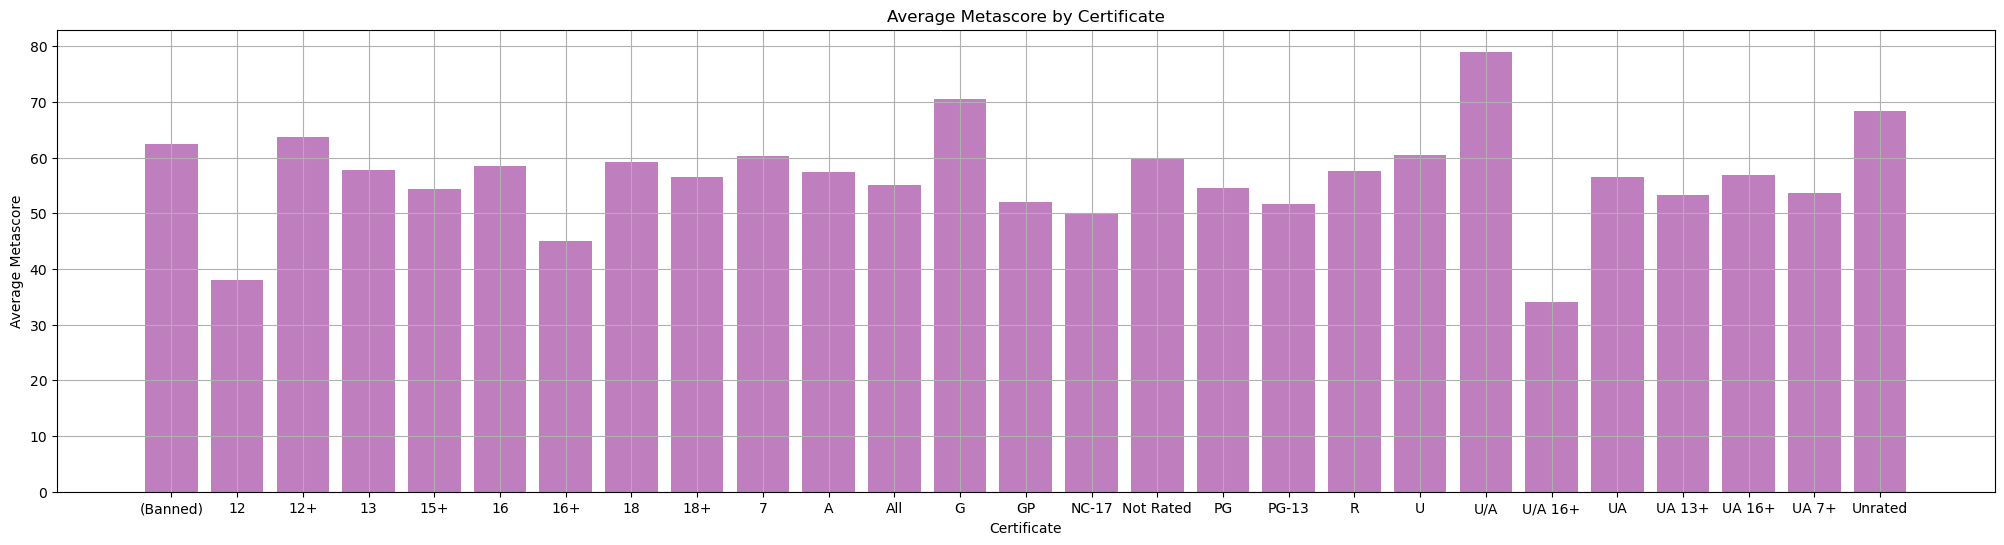

In [46]:
#Bar Graph Version
#Creating our x axis and our Tick locations
x_axis= np.arange(len(average_metascore_df))
tick_locations = [value + 0.4 for value in x_axis]

#Creating the figure
plt.figure(figsize=(25,6))
plt.bar(x_axis, average_metascore_df['Metascore'], color = "Purple", alpha = 0.5, align = "center")

#Creating our labels
plt.title("Average Metascore by Certificate")
plt.xlabel("Certificate")
plt.ylabel("Average Metascore")
plt.grid()

# Setting the x-axis labels
plt.xticks(ticks=x_axis, labels=average_metascore_df['Certificate'])

#Saving as a PDF
plt.savefig('meteascore_average_graph.pdf', format='pdf')

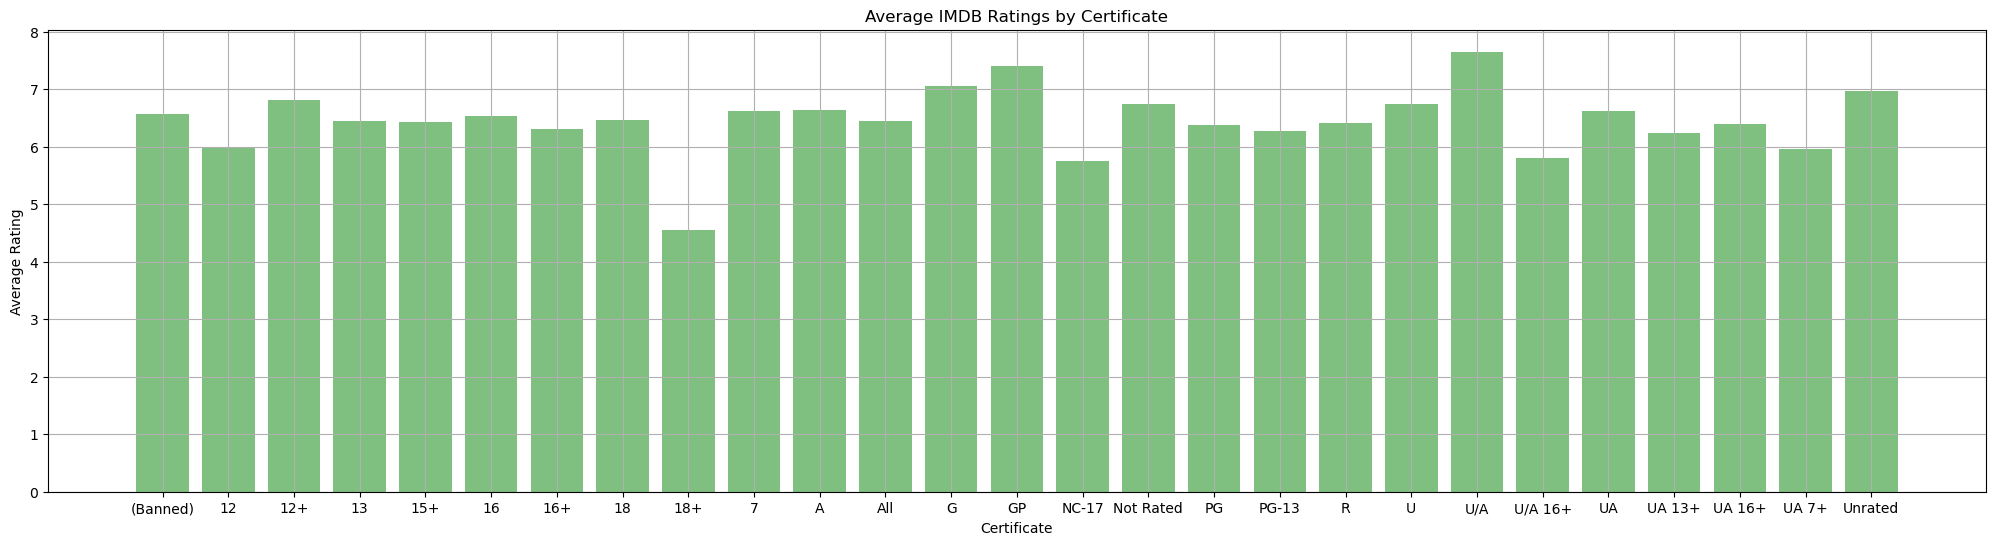

In [48]:
#Bar Graph Version
#Creating our x axis and our Tick locations
x_axis= np.arange(len(average_rating_df))
tick_locations = [value + 0.4 for value in x_axis]

#Creating the figure
plt.figure(figsize=(25,6))
plt.bar(x_axis, average_rating_df['Rating'], color = "Green", alpha = 0.5, align = "center")

#Creating our labels
plt.title("Average IMDB Ratings by Certificate")
plt.xlabel("Certificate")
plt.ylabel("Average Rating")
plt.grid()

# Setting the x-axis labels
plt.xticks(ticks=x_axis, labels=average_rating_df['Certificate'])

#Saving as a PDF
plt.savefig('rating_average_graph.pdf', format='pdf')

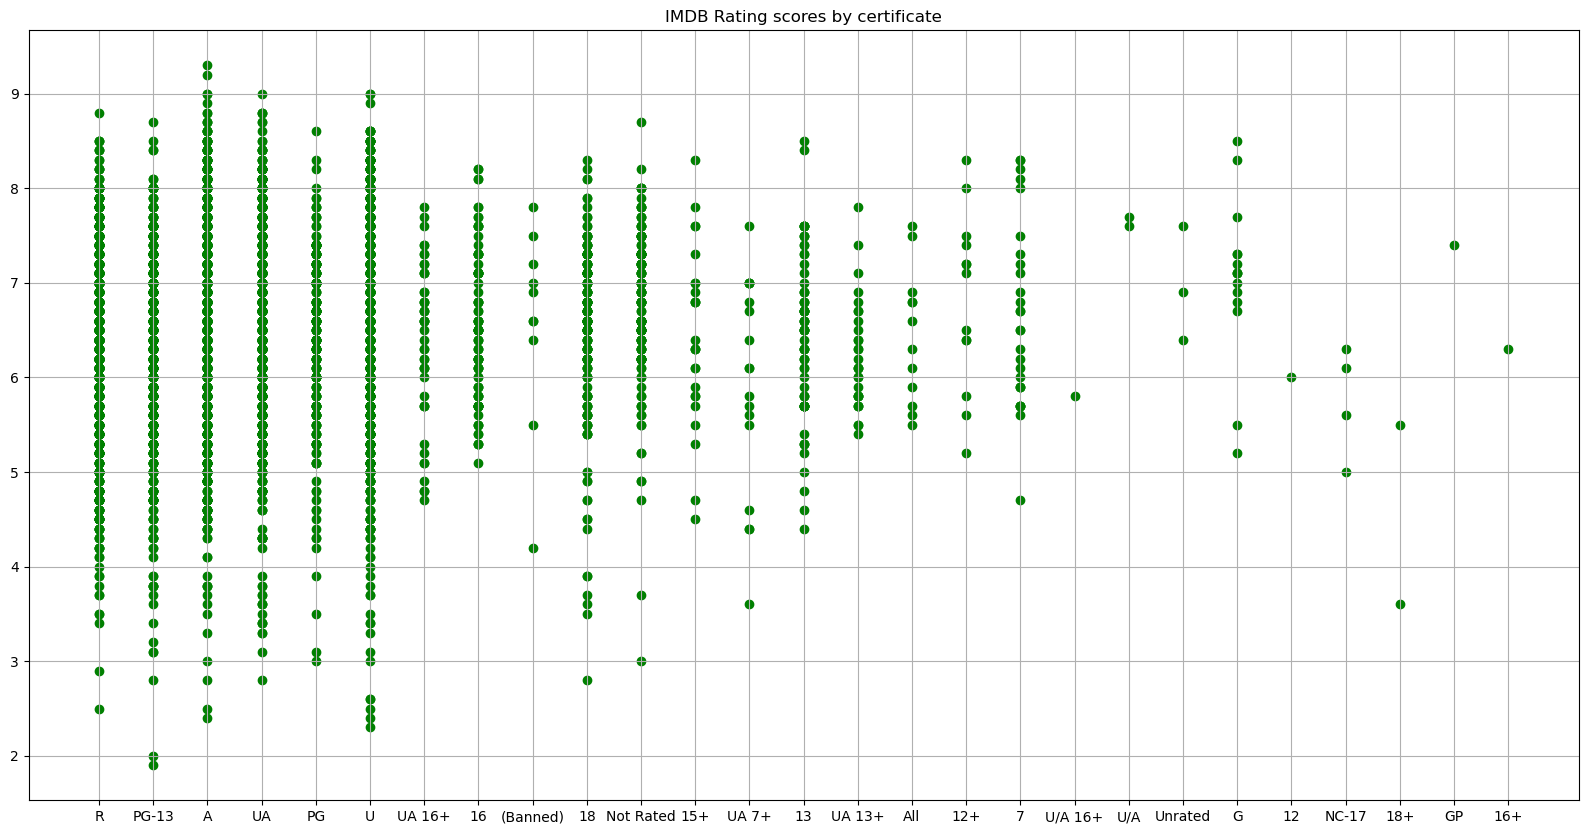

In [50]:
#Scatter Plot Version Rating
x_axis = movie_data_df["Certificate"]
y_axis = movie_data_df["Rating"]

#Creating the figure size for Bargraph
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker = "o", color = "green")
plt.grid()
plt.title("IMDB Rating scores by certificate")

#Saving as a PDF
plt.savefig('rating_scatter_graph.pdf', format='pdf')

Text(0.5, 1.0, 'Metascores by certificate')

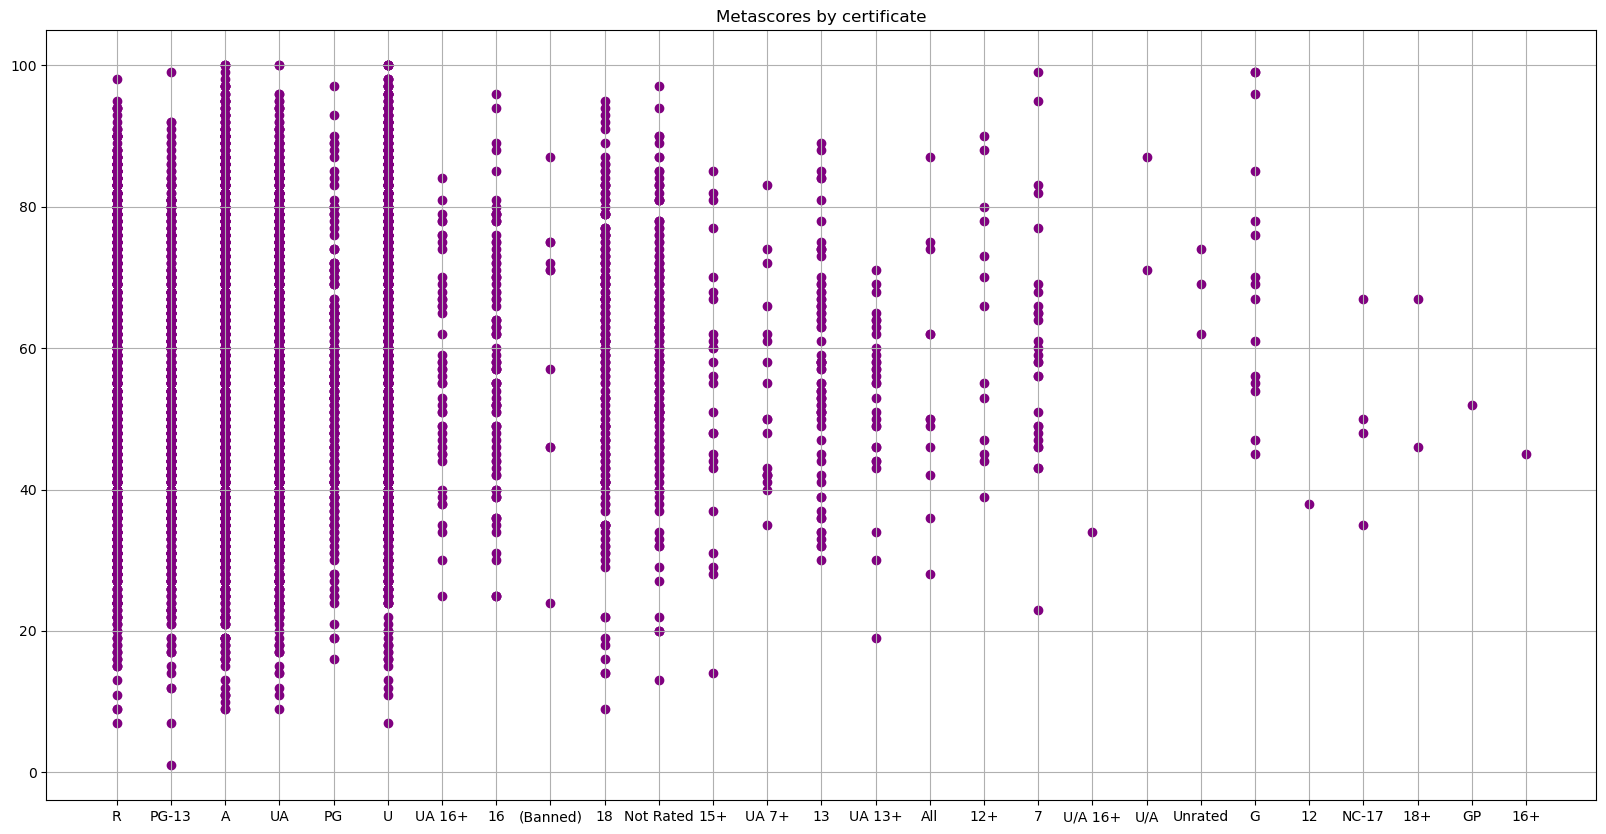

In [32]:
#Scatter Plot Version Metascore
x_axis = movie_data_df["Certificate"]
y_axis = movie_data_df["Metascore"]

#Creating the figure size for Bargraph
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker = "o", color = "purple")
plt.grid()
plt.title("Metascores by certificate")

#Saving as a PDF
plt.savefig('meteascore_averag_graph.pdf', format='pdf')

In [10]:
#Converting the rating scores to be applicable to the metascore ratings
rating_conversion = average_rating_df["Rating"]*10
rating_conversion

0     65.700000
1     60.000000
2     68.153846
3     64.521739
4     64.240000
5     65.266667
6     63.000000
7     64.577381
8     45.500000
9     66.250000
10    66.288690
11    64.416667
12    70.466667
13    74.000000
14    57.500000
15    67.330882
16    63.800995
17    62.657895
18    64.028676
19    67.455497
20    76.500000
21    58.000000
22    66.231047
23    62.333333
24    63.891304
25    59.611111
26    69.666667
Name: Rating, dtype: float64

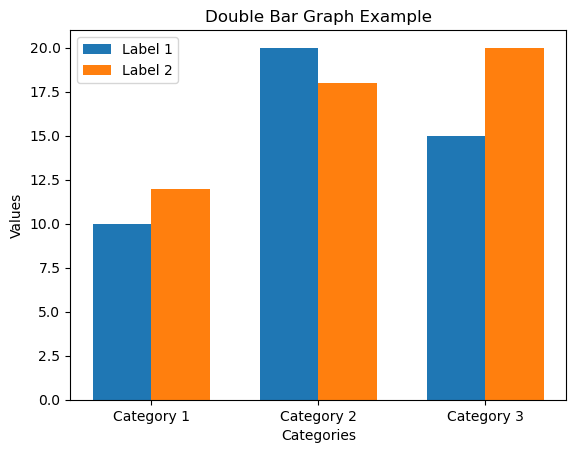

In [40]:
#Comparison Graph example
# Data
categories = ['Category 1', 'Category 2', 'Category 3']
values1 = [10, 20, 15]
values2 = [12, 18, 20]

# Bar settings
bar_width = 0.35
index = np.arange(len(categories))

# Plot
plt.bar(index, values1, bar_width, label='Label 1')
plt.bar(index + bar_width, values2, bar_width, label='Label 2')

# Labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Double Bar Graph Example')
plt.xticks(index + bar_width / 2, categories)
plt.legend()

# Show plot
plt.show()

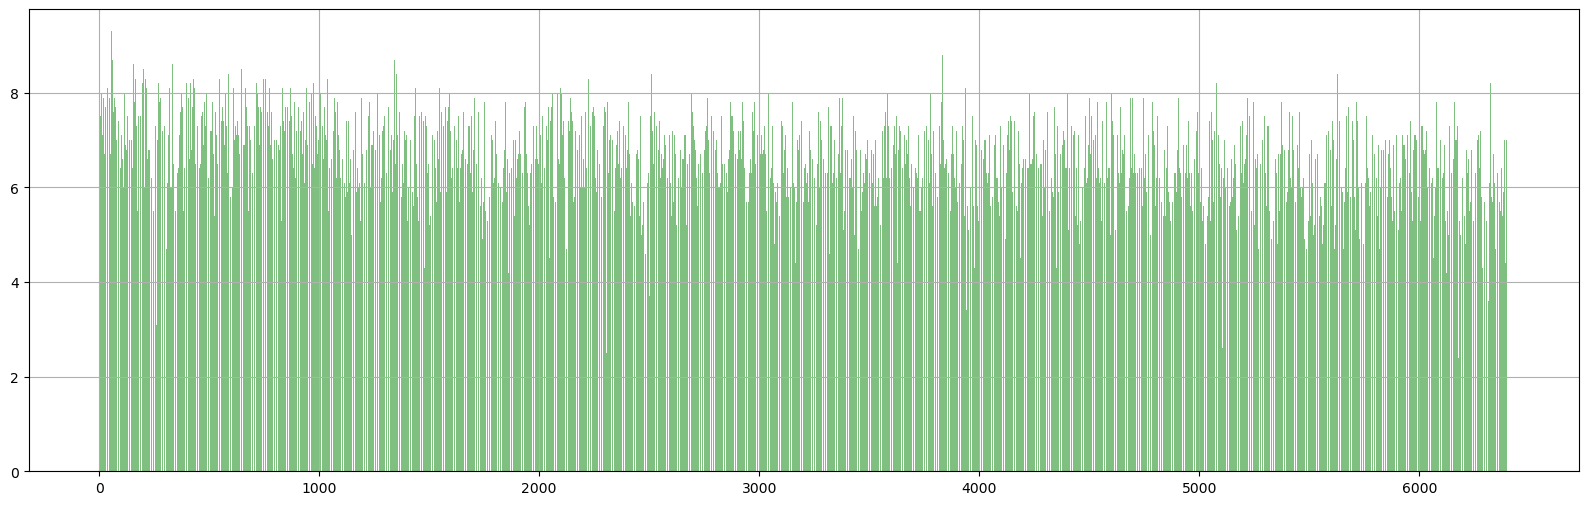

In [12]:
#Grass like Graph Blooper
#Creating our x axis and our Tick locations
x_axis= np.arange(len(movie_data_df))
tick_locations = [value + 0.4 for value in x_axis]

#Creating the figure size for Bargraph
plt.figure(figsize=(20,6))
plt.bar(x_axis, movie_data_df["Rating"], color = "Green", alpha = 0.5, align = "center")
plt.title
plt.grid()
